# 번역기를 만들어보자

In [144]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np

In [145]:
file_path = '/content/drive/MyDrive/exploration/Ex10/jpn.txt'
lines = pd.read_csv(file_path, names=['eng', 'jpn', 'cc'], sep='\t')
print('전체 샘플의 수 : ', len(lines))
lines.sample(10)

전체 샘플의 수 :  93356


,eng,jpn,cc
51961,He made a gesture of impatience.,彼はもう我慢がならないという身振りをした。,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
44357,Tom is studying music theory.,トムは音楽理論を習っています。,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
5210,He has two cats.,彼は猫を二匹飼っています。,CC-BY 2.0 (France) Attribution: tatoeba.org #7...
85381,Tell me why you were absent from school yester...,昨日学校を休んだ理由をいいなさい。,CC-BY 2.0 (France) Attribution: tatoeba.org #1...
92634,If there's anything at all that you don't unde...,何かわからないことがあったら、いつでも聞いてくれればいいからね。,CC-BY 2.0 (France) Attribution: tatoeba.org #1...
90252,Tom secretly read Mary's diary while she was t...,トムはメアリーがお風呂に入ってる隙に、彼女の日記をこっそり読んだんだよ。,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
65796,Do your homework before you watch TV.,テレビを見る前に宿題をしなさい。,CC-BY 2.0 (France) Attribution: tatoeba.org #3...
29243,I saw him cross the road.,彼が道路を渡るのを見た。,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
63941,I overslept so I was late to school.,寝坊したから、学校に遅刻した。,CC-BY 2.0 (France) Attribution: tatoeba.org #4...
69158,She lay on the bed with her eyes open.,彼女は目を開けたままベッドに横になっていた。,CC-BY 2.0 (France) Attribution: tatoeba.org #3...


In [146]:
lines = lines[['eng', 'jpn']][:3000] # 3000개 샘플 사용
lines.sample(5)

,eng,jpn
2781,Don't give up.,降参するな。
1064,I'm hungry.,腹減ったな。
364,I'm busy.,忙しいです。
2730,Can I hug you?,ぎゅーしていい？
337,Hurry up.,さあ、急いで。


- 5개의 샘플이 출력 된 것을 확인 가능.

In [147]:
# 시작 토큰과 종료 토큰 추가
sos_token = '\t'
eos_token = '\n'

lines.jpn = lines.jpn.apply(lambda x : '\t ' + x + ' \n')
print("전체 샘플 수 : ", len(lines))
lines.sample(5)

전체 샘플 수 :  3000


,eng,jpn
2101,I lucked out.,\t 私ね、運に恵まれてたわ。 \n
1553,I'm no fool.,\t 僕は馬鹿なんかじゃないぞ。 \n
1004,I love her.,\t 彼女のことが大好きです。 \n
1279,What is it?,\t それは何ですか。 \n
1419,How are you?,\t 元気？ \n


In [148]:
eng_tokenizer = Tokenizer(char_level = True) # "문자" 단위로 Tokenizer를 생성합니다.
eng_tokenizer.fit_on_texts(lines.eng) # 50000개의 행을 가진 eng의 각 행에 토큰화를 수행
input_text = eng_tokenizer.texts_to_sequences(lines.eng) # input단어를 숫자값 인덱스로 변환하여 저장 
input_text[:3]

[[20, 4, 6], [20, 4, 6], [12, 3, 6]]

In [149]:
jpn_tokenizer = Tokenizer(char_level = True) # 문자 단위로 Tokenizer 생성 (일본어)
jpn_tokenizer.fit_on_texts(lines.jpn) # 3000개의 행을 가진 jpn의 각 행에 토큰화를 수행
target_text = jpn_tokenizer.texts_to_sequences(lines.jpn) # 단어를 숫자값 인덱스로 변환하여 저장
target_text[:3]

[[2, 1, 50, 45, 4, 1, 3],
 [2, 1, 50, 34, 10, 26, 5, 4, 1, 3],
 [2, 1, 32, 28, 24, 39, 6, 4, 1, 3]]

In [150]:
eng_vocab_size = len(eng_tokenizer.word_index) + 1
jpn_vocab_size = len(jpn_tokenizer.word_index) + 1
print("영어 단어징의 크기 :", eng_vocab_size)
print("일본어어 단어장의 크기 :", jpn_vocab_size)

영어 단어징의 크기 : 46
일본어어 단어장의 크기 : 873


In [151]:
max_eng_seq_len = max([len(line) for line in input_text])
max_jpn_seq_len = max([len(line) for line in target_text])

print("영어 시퀀스의 최대 길이 : ", max_eng_seq_len)
print("일본어 시퀀스의 최대 길이 : ", max_jpn_seq_len)

영어 시퀀스의 최대 길이 :  14
일본어 시퀀스의 최대 길이 :  30


In [152]:
print("전체 샘플의 수 :", len(lines))
print("영어 단어장의 크기 :", eng_vocab_size)
print("일본어 단어장의 크기 :", jpn_vocab_size)
print("영어 시퀀스의 최대 길이 :", max_eng_seq_len)
print("일본어 시퀀스의 최대 길이 :", max_jpn_seq_len)

전체 샘플의 수 : 3000
영어 단어장의 크기 : 46
일본어 단어장의 크기 : 873
영어 시퀀스의 최대 길이 : 14
일본어 시퀀스의 최대 길이 : 30


In [153]:
encoder_input = input_text

# 종료 토큰 제거
decoder_input = [[char for char in line if char != jpn_tokenizer.word_index[eos_token]] for line in target_text]

# 시작 토큰 제거
decoder_target = [[char for char in line if char != jpn_tokenizer.word_index[sos_token]] for line in target_text]

In [154]:
print(decoder_input[:3])
print(decoder_target[:3])

[[2, 1, 50, 45, 4, 1], [2, 1, 50, 34, 10, 26, 5, 4, 1], [2, 1, 32, 28, 24, 39, 6, 4, 1]]
[[1, 50, 45, 4, 1, 3], [1, 50, 34, 10, 26, 5, 4, 1, 3], [1, 32, 28, 24, 39, 6, 4, 1, 3]]


In [155]:
encoder_input = pad_sequences(encoder_input, maxlen = max_eng_seq_len, padding='post')
decoder_input = pad_sequences(decoder_input, maxlen = max_jpn_seq_len, padding='post')
decoder_target = pad_sequences(decoder_target, maxlen = max_jpn_seq_len, padding='post') # 제로패딩

print("영어 데이터의 크기(shape) :", np.shape(encoder_input))
print("일본어 입력 데이터의 크기(shape) :", np.shape(decoder_input))
print("일본어 출력 데이터의 크기(shape) :", np.shape(decoder_target))

영어 데이터의 크기(shape) : (3000, 14)
일본어 입력 데이터의 크기(shape) : (3000, 30)
일본어 출력 데이터의 크기(shape) : (3000, 30)


In [156]:
print(encoder_input[0])

[20  4  6  0  0  0  0  0  0  0  0  0  0  0]


In [157]:
encoder_input = to_categorical(encoder_input)
decoder_input = to_categorical(decoder_input)
decoder_target = to_categorical(decoder_target)

print("영어 데이터의 크기 (shape) :", np.shape(encoder_input))
print("일본어 입력데이터의 크기 (shape) :", np.shape(decoder_input))
print("일본어 출력데이터의 크기 (shape) :", np.shape(decoder_target))

영어 데이터의 크기 (shape) : (3000, 14, 46)
일본어 입력데이터의 크기 (shape) : (3000, 30, 873)
일본어 출력데이터의 크기 (shape) : (3000, 30, 873)


In [158]:
n_of_val = 10 # 교차검증 횟수

encoder_input_train = encoder_input[:-n_of_val] 
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print("영어 학습 데이터의 크기 (shape) :", np.shape(encoder_input))
print("일본어 학습 입력데이터의 크기 (shape) :", np.shape(decoder_input))
print("일본어 학습 출력데이터의 크기 (shape) :", np.shape(decoder_target))

영어 학습 데이터의 크기 (shape) : (3000, 14, 46)
일본어 학습 입력데이터의 크기 (shape) : (3000, 30, 873)
일본어 학습 출력데이터의 크기 (shape) : (3000, 30, 873)


# 모델 훈련

In [159]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.models import Model

In [160]:
# 입력 텐서 생성
encoder_inputs = Input(shape=(None, eng_vocab_size))
# hidden state가 256인 인코더의 LSTM 셸을 생성
encoder_lstm = LSTM(units = 256, return_state = True)
# 디코더로 전달할 hidden state, cell state를 리턴, encoder_outputs는 여기서는 불필요
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
# hidden state와 cell state를 다음 time step으로 전달하기 위해서 별도 저장
encoder_states = [state_h, state_c]

In [161]:
# 입력 텐서 생성
decoder_inputs = Input(shape=(None, jpn_vocab_size))
# hidden size가 256인 인코더의 LSTM셸 생성
decoder_lstm = LSTM(units = 256, return_sequences = True, return_state = True)
# decoder_outputs는 모든 time step의 hidden state
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state = encoder_states)

In [162]:
decoder_softmax_layer = Dense(jpn_vocab_size, activation='softmax') # 최종 출력층 레이어
decoder_outputs = decoder_softmax_layer(decoder_outputs) 

In [163]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, None, 46)]   0           []                               
                                                                                                  
 input_18 (InputLayer)          [(None, None, 873)]  0           []                               
                                                                                                  
 lstm_8 (LSTM)                  [(None, 256),        310272      ['input_17[0][0]']               
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                           

In [164]:
hist = model.fit(
    x=[encoder_input_train, decoder_input_train],
    y = decoder_target_train,
    validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),
    batch_size = 128,
    epochs = 50)

Epoch 1/50
24/24 [==============================] - 4s 53ms/step - loss: 2.4050 - val_loss: 1.3864
Epoch 2/50
24/24 [==============================] - 0s 20ms/step - loss: 1.5198 - val_loss: 1.3298
Epoch 3/50
24/24 [==============================] - 0s 20ms/step - loss: 1.4483 - val_loss: 1.2959
Epoch 4/50
24/24 [==============================] - 0s 20ms/step - loss: 1.4171 - val_loss: 1.2790
Epoch 5/50
24/24 [==============================] - 0s 21ms/step - loss: 1.3912 - val_loss: 1.2659
Epoch 6/50
24/24 [==============================] - 0s 20ms/step - loss: 1.3417 - val_loss: 1.2226
Epoch 7/50
24/24 [==============================] - 0s 20ms/step - loss: 1.2797 - val_loss: 1.2557
Epoch 8/50
24/24 [==============================] - 0s 20ms/step - loss: 1.2091 - val_loss: 1.1251
Epoch 9/50
24/24 [==============================] - 0s 21ms/step - loss: 1.1533 - val_loss: 1.0870
Epoch 10/50
24/24 [==============================] - 0s 20ms/step - loss: 1.0942 - val_loss: 1.0630
Epoch 11/

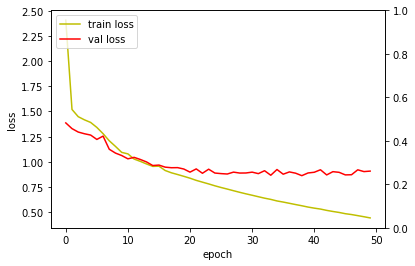

In [165]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

plt.show()

- train과 validation loss가 우하향 곡선을 가지긴한다.

- val loss는 epoch 20회까지는 줄어들지만, 이후에는 변동이 사실상 없는 것 같다.(train 크기에 비해서 val의 크기가 커서 그런건지??)

In [166]:
encoder_model = Model(inputs = encoder_inputs, outputs = encoder_states)
encoder_model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, None, 46)]        0         
                                                                 
 lstm_8 (LSTM)               [(None, 256),             310272    
                              (None, 256),                       
                              (None, 256)]                       
                                                                 
Total params: 310,272
Trainable params: 310,272
Non-trainable params: 0
_________________________________________________________________


In [167]:
# 이전 time step의 hidden state를 저장하는 텐서
decoder_state_input_h = Input(shape = (256,))
# 이전 time step의 cell state를 저장하는 텐서
decoder_state_input_c = Input(shape = (256,))
# 이전 time step의 hidden state와 cell state를 하나의 변수에 저장
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

# decoder_states_inputs를 현재 time_step의 초기 상태로 사용
# 구체적인 동작 자체는 def decode_sequence()에 구현
decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state = decoder_states_inputs)
# 현재 time step의 hidden state와 cell state를 하나의 변수에 저장
decoder_states = [state_h, state_c]

In [168]:
decoder_outputs = decoder_softmax_layer(decoder_outputs)
decoder_model = Model(inputs = [decoder_inputs] + decoder_states_inputs, outputs=[decoder_outputs] + decoder_states)
decoder_model.summary()

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, None, 873)]  0           []                               
                                                                                                  
 input_19 (InputLayer)          [(None, 256)]        0           []                               
                                                                                                  
 input_20 (InputLayer)          [(None, 256)]        0           []                               
                                                                                                  
 lstm_9 (LSTM)                  [(None, None, 256),  1157120     ['input_18[0][0]',               
                                 (None, 256),                     'input_19[0][0]',        

In [169]:
eng2idx = eng_tokenizer.word_index
jpn2idx = jpn_tokenizer.word_index
idx2eng = eng_tokenizer.index_word
idx2jpn = jpn_tokenizer.index_word

In [170]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    states_value = encoder_model.predict(input_seq)
    
    # <SOS>에 해당하는 원-핫 벡터 생성
    target_seq = np.zeros((1, 1, jpn_vocab_size))
    target_seq[0, 0, jpn2idx['\t']] = 1.

    stop_condition = False
    decoded_sentence = ""
    
    # stop_condition이 True가 될 때까지 루프 반복
    while not stop_condition:
        # 이전 시점에서 상태 states_value를 현 시점의 초기 상태로 사용
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        
        # 예측 결과를 문자로 변환
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = idx2jpn[sampled_token_index]
        
        # 현재 시점의 예측 문자를 예측 문장에 추가
        decoded_sentence += sampled_char
        
        # <eos>에 도달하거나 최대 길이를 넘으면 중단
        if (sampled_char == '\n') or len(decoded_sentence) > max_jpn_seq_len:
            stop_condition = True
        
        # 현재 시점의 예측 결과를 다음 시점의 입력으로 사용하기 위해 저장
        target_seq = np.zeros((1, 1, jpn_vocab_size))
        target_seq[0, 0, sampled_token_index] = 1.
        
        # 현재 시점의 상태를 다음 시점의 상태로 사용하기 위해 저장
        states_value = [h, c]
        
    
    return decoded_sentence

In [175]:
import numpy as np

for seq_index in [0, 100, 20, 30, 500, 2100]:
    input_seq = encoder_input[seq_index : seq_index+1]
    decoded_sentence = decode_sequence(input_seq)
    print(35 * "-")
    print("입력 문장 :", lines.eng[seq_index])
    print("정답 문장 :", lines.jpn[seq_index][1:len(lines.jpn[seq_index]) -1])
    print("번역기가 번약한 문장 :", decoded_sentence[:len(decoded_sentence)-1])

1/1 [==============================] - 0s 16ms/step
-----------------------------------
입력 문장 : Go.
정답 문장 :  行け。 
번역기가 번약한 문장 :  出て！ 
1/1 [==============================] - 0s 17ms/step
-----------------------------------
입력 문장 : Listen.
정답 문장 :  聞きなさい。 
번역기가 번약한 문장 :  トムに聞いて。 
1/1 [==============================] - 0s 16ms/step
-----------------------------------
입력 문장 : Jump!
정답 문장 :  跳べ！ 
번역기가 번약한 문장 :  飛び跳ねて！ 
1/1 [==============================] - 0s 16ms/step
-----------------------------------
입력 문장 : Wait!
정답 문장 :  待って！ 
번역기가 번약한 문장 :  待ってください。 
1/1 [==============================] - 0s 16ms/step
-----------------------------------
입력 문장 : Don't die.
정답 문장 :  死なないで。 
번역기가 번약한 문장 :  諦めなさい。 
1/1 [==============================] - 0s 17ms/step
-----------------------------------
입력 문장 : I lucked out.
정답 문장 :  俺って、ツイてたよ。 
번역기가 번약한 문장 :  私は運転します。 


1. 입력 문장 : Go. 정답 문장 :  行け。(가라.) 번역기가 번약한 문장 :  出て! (나가라!)
2. 입력 문장 : Listen. (들어)
정답 문장 :  聞きなさい。  (들으세요.)
번역기가 번약한 문장 :  トムに聞いて。 (톰에게 **들었다.**)
3. 입력 문장 : Jump! 
정답 문장 :  跳べ！ (뛰어!)
번역기가 번약한 문장 :  飛び跳ねて！ (**뛰어 올라!**)

4. 입력 문장 : Wait! 
정답 문장 :  待って！ (기다려!) 
번역기가 번약한 문장 :  待ってください。 (**기다려 주세요.**) 
5. 입력 문장 : Don't die.
정답 문장 :  死なないで。 (죽지마.)
번역기가 번약한 문장 :  諦めなさい。(포기해라)
6. 입력 문장 : I lucked out. (나는 운이 좋다.)
정답 문장 :  俺って、ツイてたよ。 (나에게 운이 들러붙었다.)
번역기가 번약한 문장 :  私は運転します。 (나는 운전합니다/ 運転(*운*전) - 幸運(행*운*) '옮길 운'자를 사용 하긴했다. 아마도 ツイてたよ가 은어여서 제대로 구분을 못한 것 같다.)


# 회고

- seq2seq가 그림상으로는 간단하길래 금방 끝낼 거라 생각을 했는데, 지금까지 한 Exploration 중에서 가장 오래 잡고 있었던 것 같다.
![gartner](https://github.com/fmfmsd/Chamchee/blob/main/Exploration2/Ex10/hype-cycle-for-artificial-intelligence-2022.png?raw=true)



> 위 그래프를 보면 컴퓨터 비젼은 상용화에 가까워졌지만, NLP의 경우 상용화에 적어도 5~10년이 걸릴 것으로 예상이 된다고 한다.


- 지금까지 NLP exploration은 기본중의 기본만 다루고 있는데도 불구하고, 내가 지금 정확히 어떻게 무엇을 하고 있는지 이해가 안되는 부분이 많다. 아이펠을 맨 처음에 시작할 때 난 꼭 CV를 해야지 라고 마음을 먹고 시작했지만, 오히려 시간이 지날수록 NLP쪽에 호기심이 생기고 있다.